# Жиделев Сергей
# РИ-401002, ВАРИАНТ 10

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA


**3 задание**

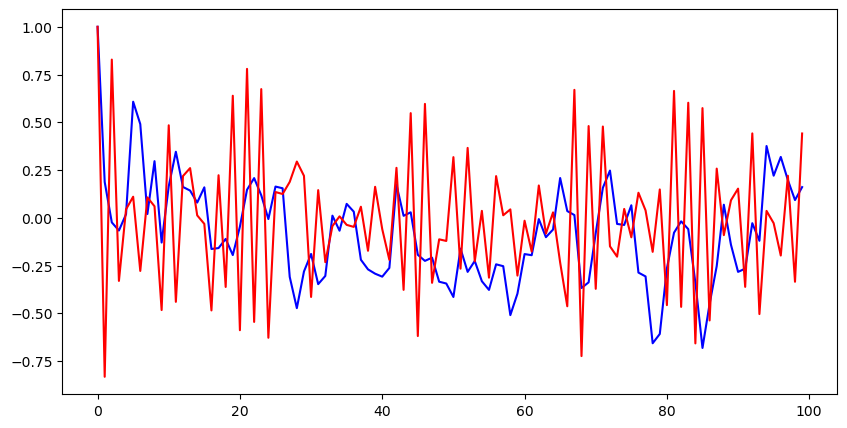

In [2]:
z1 = np.zeros(100)
z2 = np.zeros(100)
z1[0] = 1
z2[0] = 1
for i in range(1,100):
 z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()
 z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b')
plt.plot(z2, 'r')
plt.show()

**4 задание**

<Figure size 1000x500 with 0 Axes>

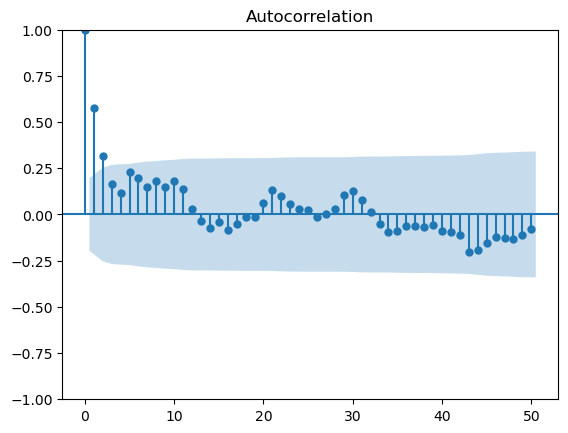

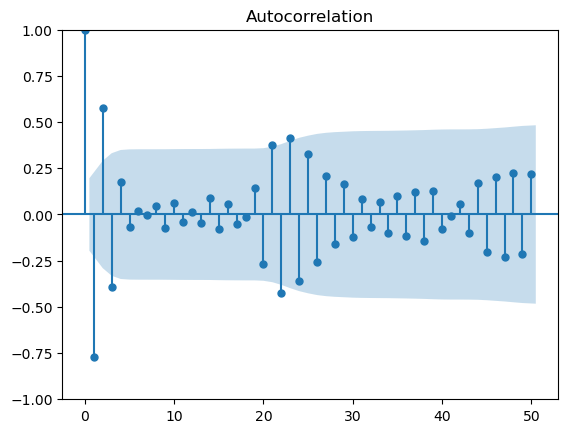

In [3]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
plot_acf(z2, lags=50)
plt.show()

**5) Сравните эти графики между собой: укажите их сходства и различия,
а также характерные особенности, которые позволяют отнести их к
модели АР первого порядка.**

Наиболее высоким коэффициентом автокорреляции оказался p(1), то есть первый порядок, что означает о присутствии тренда в обоих ВР.

Оба графика с ростом лага затухают, однако первый график делает это постепенно, в этом можно убедиться, посмотрев на последующие порядки(2, 3, и т.д., то есть с ростом лага коэффициент автокореляции уменьшается), в отличие от второго, который затухает знакопеременно.

В самом деле, после 1-го порядка наибольшим идёт 2-й порядок с положительным коэффициентом, затем 3-й порядок снова отрицательный и так на протяжении всего графика.

**6 задание**

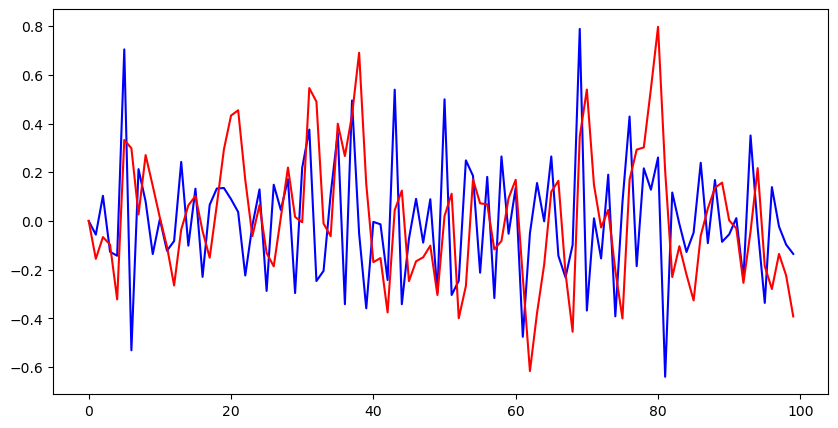

In [4]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
 z3[i] = ar[i] - 0.8 * ar[i - 1]
 z4[i] = ar[i] + 0.8 * ar[i - 1]
plt.figure(figsize = (10, 5))
plt.plot(z3, 'b')
plt.plot(z4, 'r')
plt.show()

**7-8 задание**

<Figure size 1000x500 with 0 Axes>

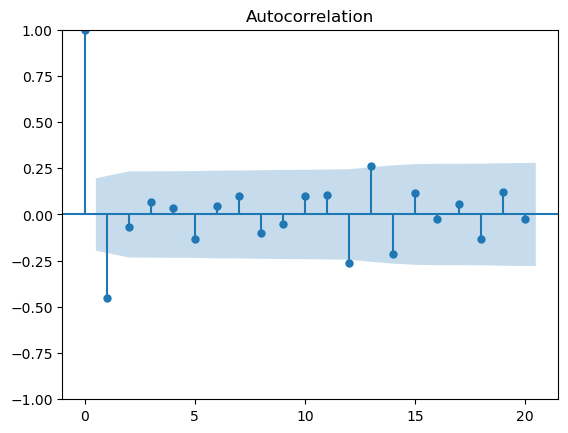

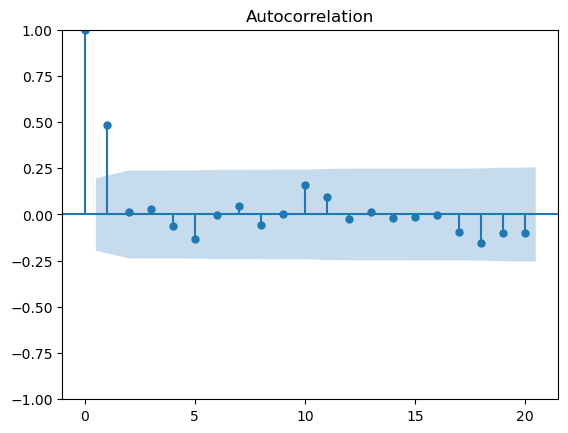

In [5]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=20)
plot_acf(z4, lags=20)
plt.show()

Оба графика имеют наибольшее значение коэффициента автокорреляции при порядке 1, следовательно у них наблюдается тренд.

При дальнейшем визуальном осмотре можно выделить следующее:
1. На обоих графиках наблюдается затухающая знакопеременность
2. На первом графике знакопеременность чередуется через 1 точку, на втором же графике при визуальном осмотре похоже на синусоидную знакопеременность.

**10 задание**

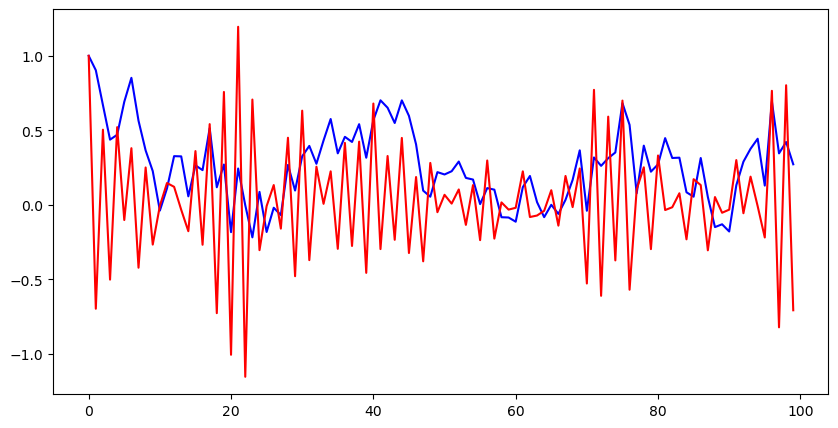

In [6]:
z5 = np.zeros(100)
z6 = np.zeros(100)
z5[0], z6[0] = 1, 1
a = 0.2 * np.random.randn(100)
for i in range(1, len(z5)):
    z5[i] = 0.8 * z5[i-1] + a[i] - 0.3 * a[i-1]
    z6[i] = -0.8 * z6[i-1] + a[i] - 0.3 * a[i-1]

plt.figure(figsize = (10, 5))
plt.plot(z5, 'b')
plt.plot(z6, 'r')
plt.show()

<Figure size 1000x500 with 0 Axes>

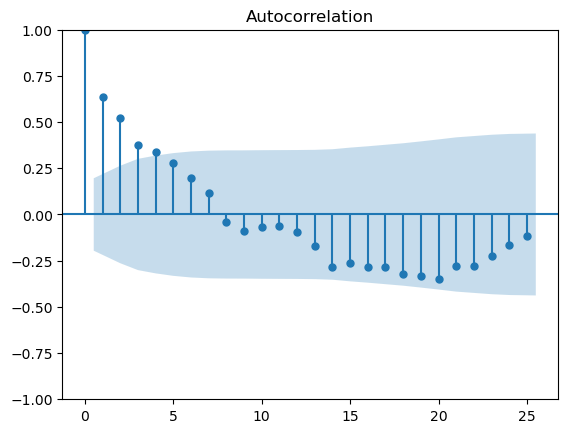

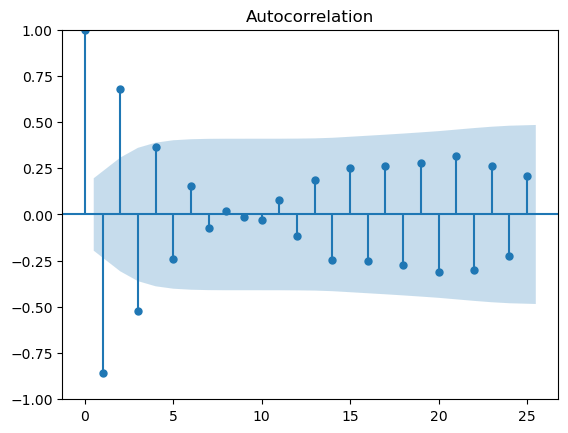

In [7]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=len(z5)/4)
plot_acf(z6, lags=len(z5)/4)
plt.show()

**11 задание**

In [8]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35]) # задаем коэффициенты СС
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100)
# создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

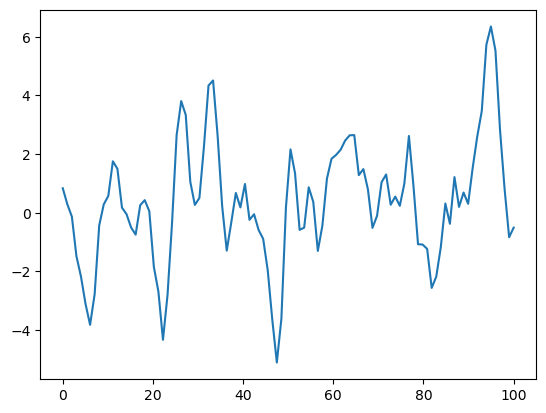

In [9]:
t = np.linspace(0, 100, 100)
plt.plot(t, y)

<Figure size 1000x500 with 0 Axes>

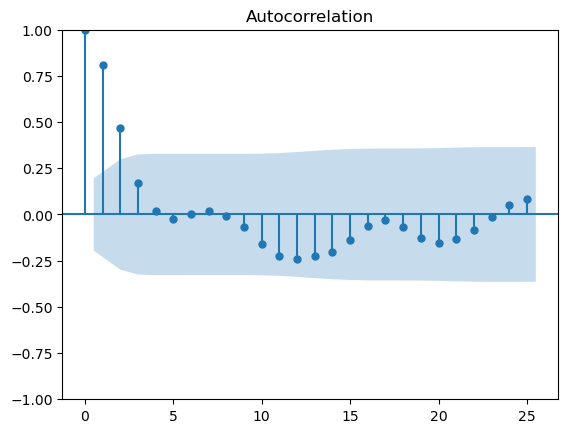

In [10]:
plt.figure(figsize = (10, 5))
plot_acf(y, lags=len(y)/4)
plt.show()

По графику можно заметить, что наша АРСС принадлежит к классу моделей некоторого порядка, поскольку у нас отсутствует спадающее значение коэффициентов коррелограммы от лага, а наоборот заметна цикличность в данных.

**13 задание**

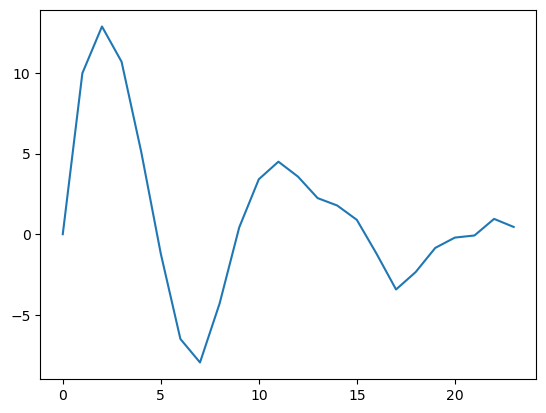

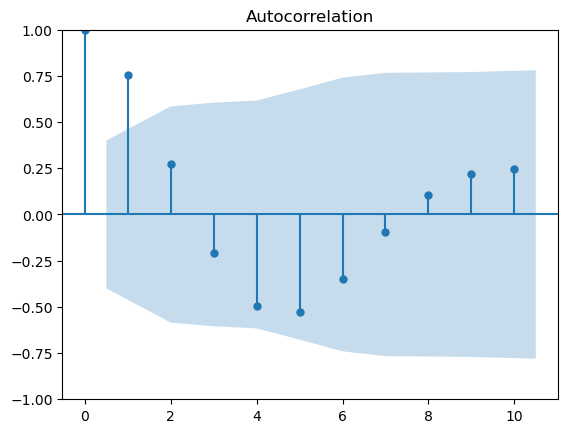

In [11]:
TEST = np.array([0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41,
4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95,
0.45])

plt.plot(TEST)
plot_acf(TEST, lags = 10)
plt.show()


**15 задание**

In [12]:
arima1 = ARIMA(TEST, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit() # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов
arima2 = ARIMA(TEST, order = (2, 0, 0))
model_fit2 = arima2.fit()
print(model_fit2.summary())
arima3 = ARIMA(TEST, order = (3, 0, 0))
model_fit3 = arima3.fit()
print(model_fit3.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -62.321
Date:                Sat, 06 Apr 2024   AIC                            130.642
Time:                        20:48:17   BIC                            134.177
Sample:                             0   HQIC                           131.580
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0213      2.697      0.379      0.705      -4.264       6.307
ar.L1          0.7298      0.140      5.208      0.000       0.455       1.004
sigma2        10.2148      2.369      4.312      0.0

**22-23 задание**

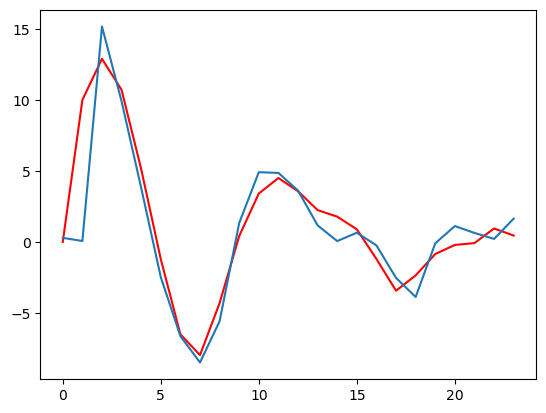

In [13]:
plt.plot(TEST, c = 'red')
plt.plot(model_fit2.fittedvalues)

In [14]:
import statsmodels.tsa.stattools as stt
stt.arma_order_select_ic(TEST)


E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'bic':             0           1           2
 0  150.571083  129.219818  115.838488
 1  134.176597  120.042236  114.610652
 2   95.542899   96.955118   99.573675
 3   97.981298  100.050982  102.693659
 4   98.176969  103.926910  100.497398,
 'bic_min_order': (2, 0)}

**24 задание**

In [16]:
file = h5py.File('Data/10.mat', 'r')
data = file.get('z10')
Z = np.array(data)
Z = Z.ravel()

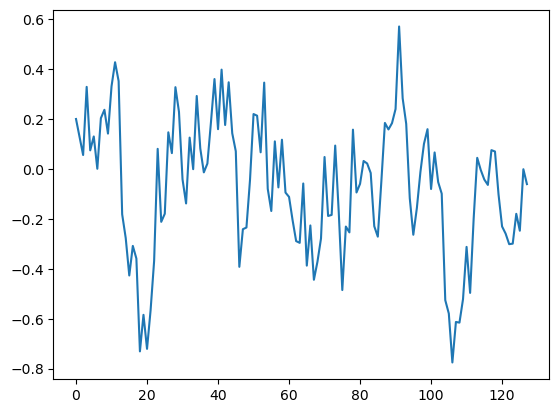

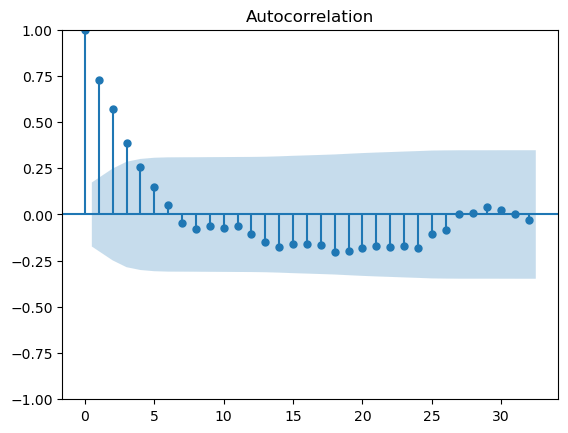

In [17]:
plt.plot(Z)
plot_acf(Z, lags = len(Z)/4)
plt.show()

**27 задание**

AR(0), MA(0)
bic - 36.31419483313566, aic - 30.610134305296427
АРКФ - [], ССКФ - []


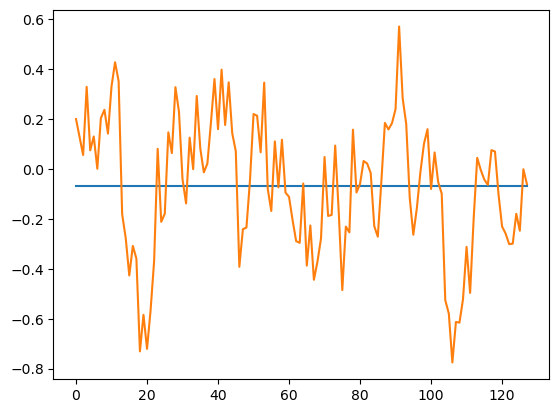

AR(0), MA(1)
bic - -13.866470661324737, aic - -22.42256145308359
АРКФ - [], ССКФ - [0.5208799]


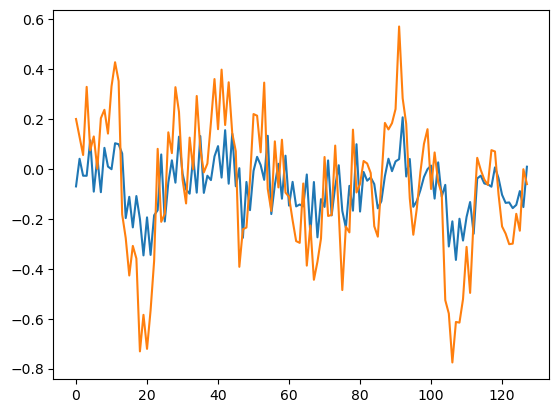

AR(1), MA(0)
bic - -55.18493440692933, aic - -63.74102519868818
АРКФ - [0.72644356], ССКФ - []


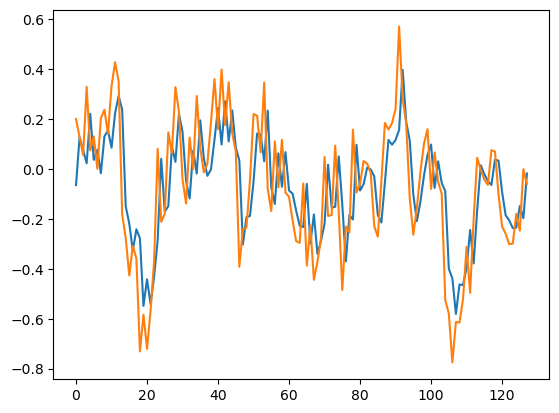

AR(1), MA(1)
bic - -51.20723405126296, aic - -62.61535510694142
АРКФ - [0.77191338], ССКФ - [-0.09642865]


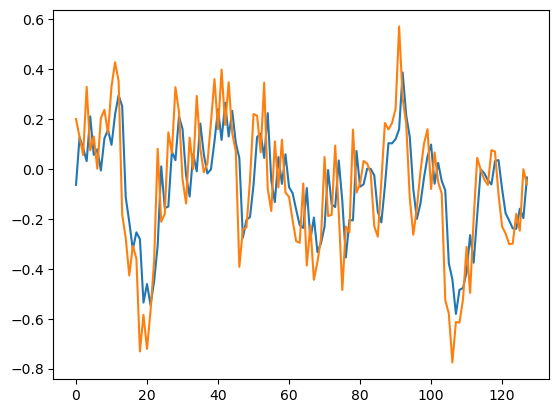

AR(2), MA(0)
bic - -51.52879248303343, aic - -62.93691353871189
АРКФ - [0.65582207 0.09623364], ССКФ - []


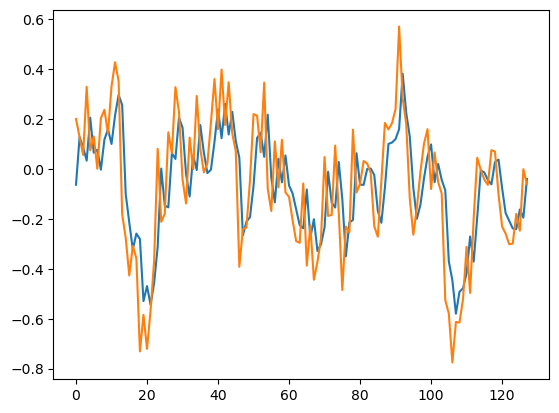

AR(2), MA(1)
bic - -47.98063119823519, aic - -62.24078251783327
АРКФ - [0.09388677 0.51421878], ССКФ - [0.55921718]


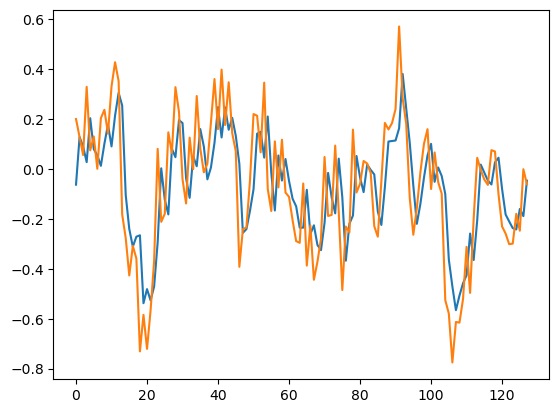

AR(3), MA(0)
bic - -48.82934977382388, aic - -63.08950109342196
АРКФ - [ 0.66864864  0.18168443 -0.12892415], ССКФ - []


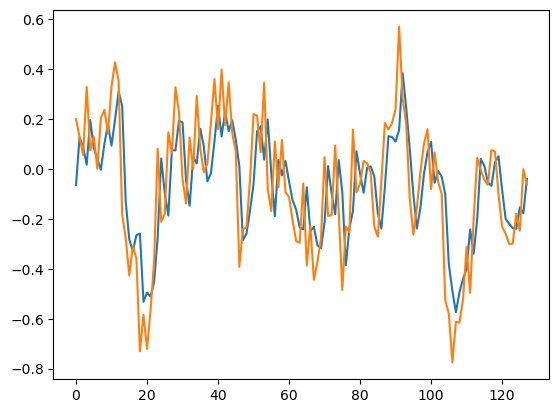

AR(3), MA(1)
bic - -45.95035327807434, aic - -63.06253486159204
АРКФ - [ 1.60994288 -0.48929355 -0.14627131], ССКФ - [-0.99729805]


E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


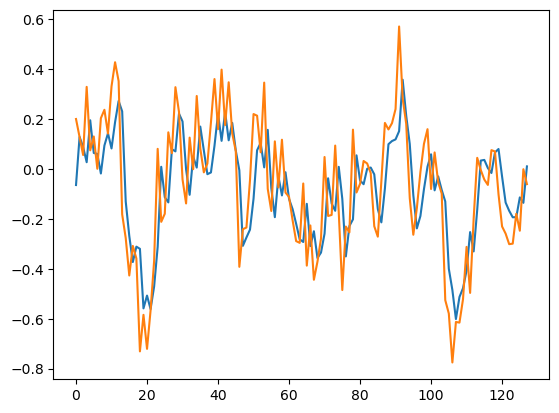

In [18]:
def Arima(x, order):
    arima = ARIMA(x, order = order) # создаем модель
    model_fit = arima.fit() # подгоняем под ВР
    return model_fit

for i in range(4):
    for j in range(2):
        a = Arima(Z, (i, 0, j)) # выводим таблицу результатов
        print(f'AR({i}), MA({j})')
        print(f'bic - {a.bic}, aic - {a.aic}')
        print(f'АРКФ - {a.arparams}, ССКФ - {a.maparams}')
        plt.plot(a.fittedvalues)
        plt.plot(Z)
        plt.show()

Среди всех моделей, нас устроит модель ARMA(1, 0): BIC-критерий равен -55, AIC-критерий равен -63. Критерий BIC является самым наименьшим средих других порядков, кроме этого, при взгляде на получившиеся графики также можно убедиться в правильном выборе модели. Модели с более высоким порядком будут отвергнуты по причине избыточности параметров.

**28 задание**

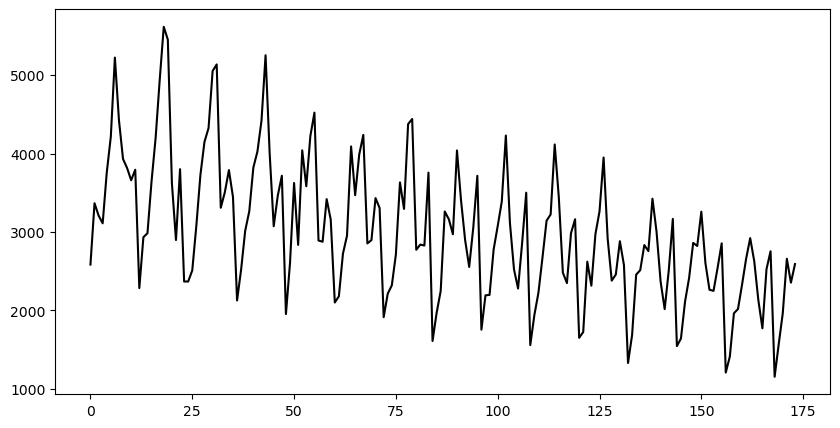

In [20]:
file = h5py.File('Data/Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
Fort = Fort.ravel()
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.show()


**29 задание**

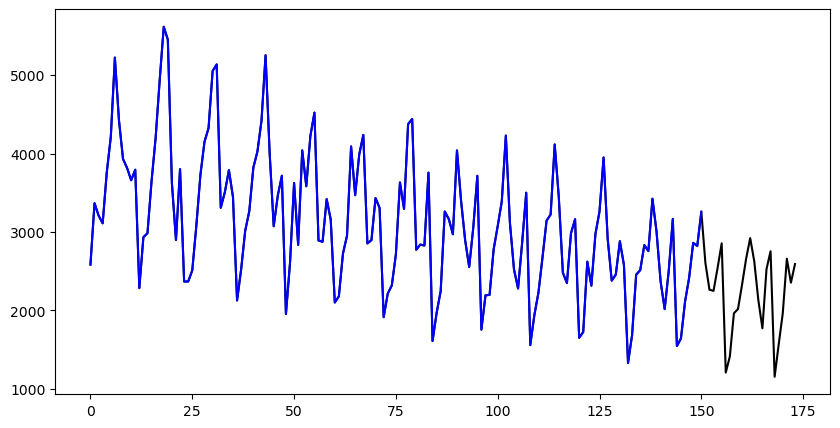

In [21]:
F = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(F, 'b') # урезанный ряд
plt.show()


**30-31 задание**

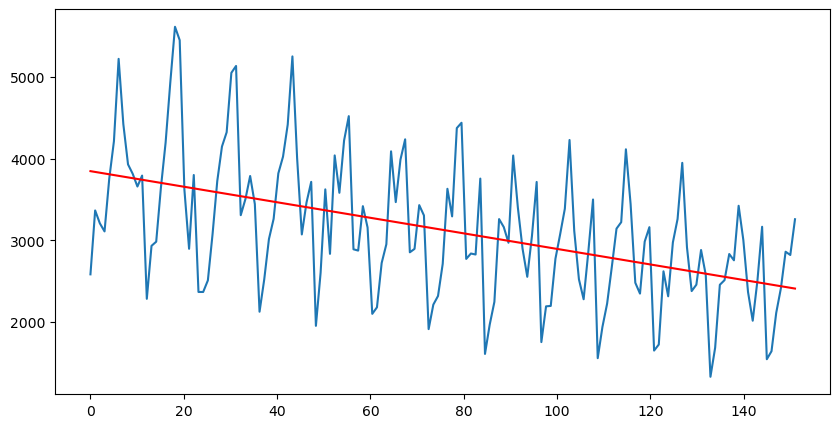

In [22]:
tf = np.linspace(0, len(F), len(F))
mod1 = np.polyfit(tf, F, 1)
plt.figure(figsize = (10, 5))
plt.plot(tf, F)
plt.plot(tf, mod1[0] * tf + mod1[1], c = 'r')

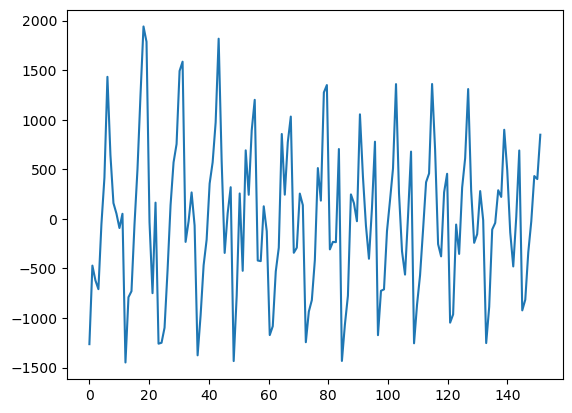

In [23]:
new_f = F - (mod1[0] * tf + mod1[1])
plt.plot(tf, new_f)

**32 задание**

In [24]:
from statsmodels.tsa.tsatools import detrend
F_minus_trend = detrend(F)

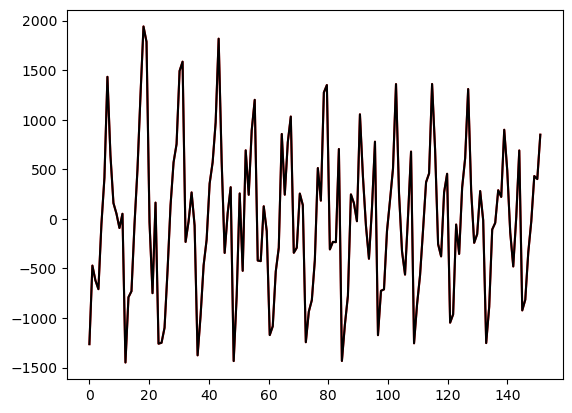

In [25]:
plt.plot(tf, F_minus_trend, c = 'red')
plt.plot(tf, new_f, c = 'k')
plt.show()

При наложении графика из пункта 30 на график из пункта 31 можно увидеть, что они идентичны.

In [26]:
print(np.mean(F_minus_trend), np.mean(new_f))

-8.673326957304746e-13 -1.6262488044946399e-13


**33 задание**

In [27]:
stt.arma_order_select_ic(F_minus_trend)

E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'bic':              0            1            2
 0  2438.335923  2400.148833  2403.810183
 1  2402.850379  2403.493174  2408.506306
 2  2403.347221  2379.964332  2410.742315
 3  2408.252526  2410.432244  2387.422565
 4  2406.764395  2368.185662  2383.219146,
 'bic_min_order': (4, 1)}

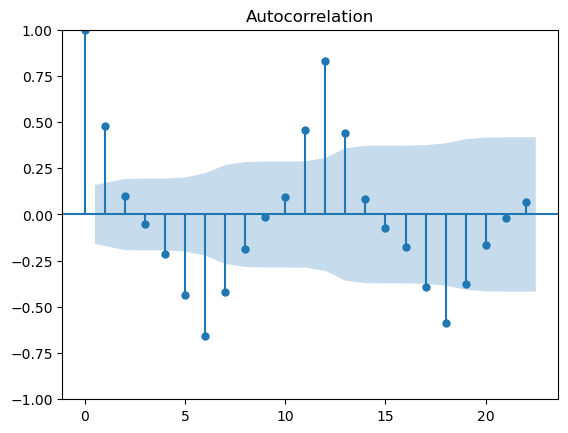

In [41]:
plot_acf(F_minus_trend)
plt.show()

In [28]:
#Функция, которая перебирает модель ARIMA(p, d, q) и выбирает лучшую модель по критерию bic
def param(x):
    arr = []
    for i in range(12, 13):
        for j in range(4):
            for m in range(12, 13):
                arimaz = ARIMA(x, order = (i, j, m))
                model = arimaz.fit()
                arr.append(model)


    min_bic = 9000000
    for i in arr:
        if i.bic < min_bic:
            min_bic = i.bic
            mod = i

    return mod

E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


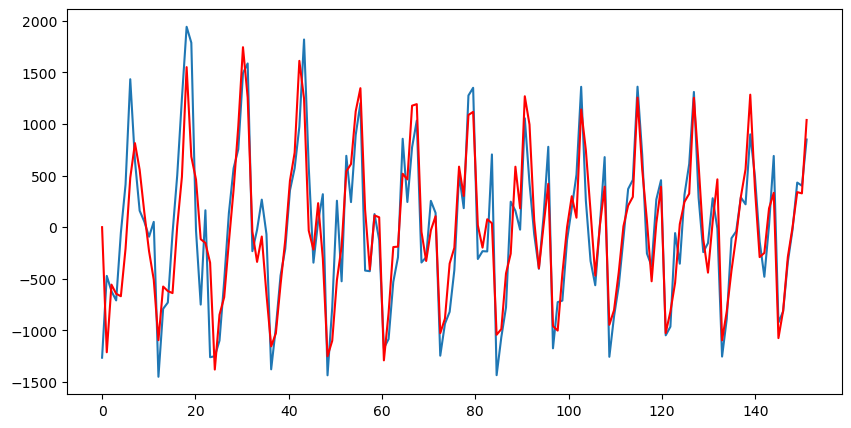

In [29]:
t = np.linspace(0, len(F_minus_trend), len(F_minus_trend))
plt.figure(figsize = (10, 5))
plt.plot(t, F_minus_trend)
plt.plot(t, param(F_minus_trend).predict(0, len(F_minus_trend)-1), c = 'red')
plt.show()

In [30]:
param(F_minus_trend).summary()

E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:               ARIMA(12, 1, 12)   Log Likelihood               -1086.342
Date:                Sat, 06 Apr 2024   AIC                           2222.684
Time:                        20:49:51   BIC                           2297.950
Sample:                             0   HQIC                          2253.262
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7043      0.796     -0.885      0.376      -2.265       0.856
ar.L2         -0.8964      0.253     -3.543      0.000      -1.392      -0.401
ar.L3         -0.7786      0.792     -0.983      0.326      -2.331       0.774
ar.L4         -0.8792      0.208     -4.229      0.000      -1.287      -0.472
ar.L5         -0.7161      0.735     -0.975      0.330      -2.156       0.724
ar.L6         -0.9187      0.193     -4.768      0.000      -1.296      -0.541
ar.L7         -0.7105      0.767     -0.927      0.354      -2.213       0.792
ar.L8         -0.9072      0.225     -4.038      0.000      -1.348      -0.467
ar.L9         -0.7558      0.769     -0.983      0.326      -2.263       0.751
ar.L10        -0.8735      0.207     -4.228      0.000      -1.278      -0.469
ar.L11        -0.6980      0.732     -0.954      0.340      -2.133       0.737
ar.L12         0.0626      0.201      0.312      0.755      -0.331       0.456
ma.L1         -0.2414      0.785     -0.307      0.759      -1.781       1.298
ma.L2          0.2261      0.927      0.244      0.807      -1.590       2.043
ma.L3         -0.0504      0.946     -0.053      0.958      -1.905       1.804
ma.L4         -0.0224      0.834     -0.027      0.979      -1.656       1.611
ma.L5         -0.2128      0.690     -0.308      0.758      -1.565       1.139
ma.L6          0.0100      0.743      0.013      0.989      -1.447       1.467
ma.L7         -0.2184      0.645     -0.339      0.735      -1.482       1.045
ma.L8          0.1205      0.729      0.165      0.869      -1.308       1.549
ma.L9         -0.0057      0.695     -0.008      0.993      -1.368       1.357
ma.L10        -0.0698      0.598     -0.117      0.907      -1.241       1.101
ma.L11        -0.0278      0.457     -0.061      0.952      -0.923       0.868
ma.L12        -0.4676      0.416     -1.125      0.261      -1.282       0.347
sigma2      7.084e+04   8304.428      8.530      0.000    5.46e+04    8.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.09
Prob(Q):                              0.92   Prob(JB):                         0.21
Heteroskedasticity (H):               0.39   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**36-37 задание**

In [31]:
model = param(F)
print(model.summary())

E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  151
Model:               ARIMA(12, 2, 12)   Log Likelihood               -1097.483
Date:                Sat, 06 Apr 2024   AIC                           2244.966
Time:                        20:49:59   BIC                           2320.065
Sample:                             0   HQIC                          2275.478
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2818      0.311     -4.127      0.000      -1.890      -0.673
ar.L2         -1.4442      0.175     -8.239      0.000      -1.788      -1.101
ar.L3         -1.3191      0.301     -4.377      0.0

E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


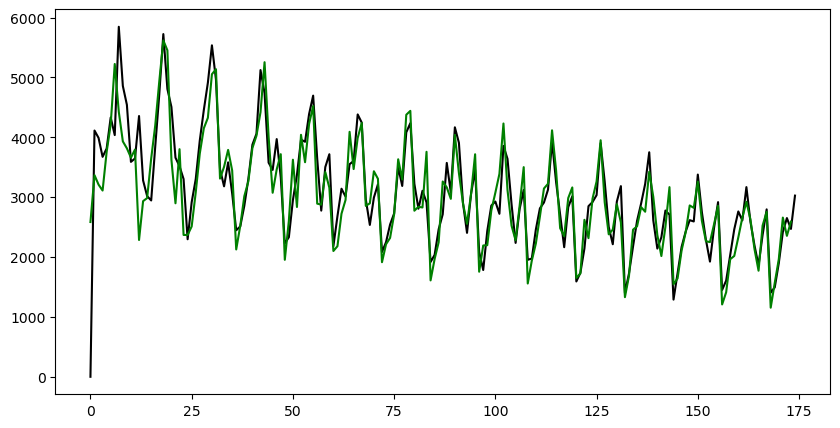

In [32]:
plt.figure(figsize = (10, 5))
plt.plot(model.predict(0, len(Fort)), 'k')
plt.plot(Fort, 'g')
plt.show()


**40 задание**

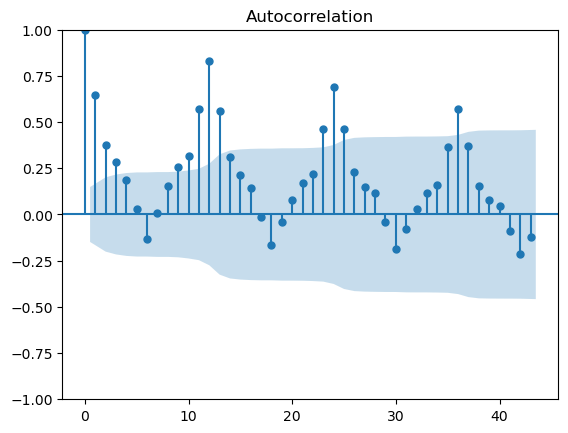

In [33]:
plot_acf(Fort, lags = len(Fort)/4)
plt.show()

In [34]:
from statsmodels.tsa.forecasting.theta import ThetaModel
tm = ThetaModel(F, period=12)
res = tm.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  endog   No. Observations:                  151
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Sat, 06 Apr 2024   Deseas. Method:         Multiplicative
Time:                        20:49:59   Period:                             12
Sample:                             0                                         
                                  151                                         
   Parameter Estimates   
           Parameters    
-------------------------
b0    -10.319688827255952
alpha 0.18562889811701097
-------------------------


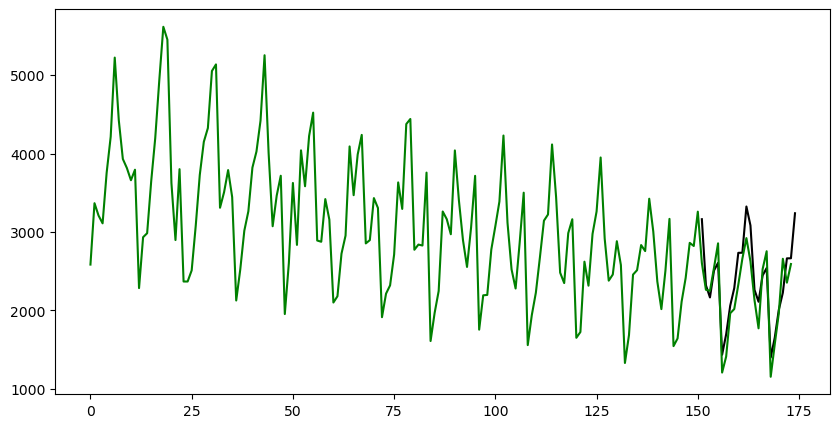

In [35]:
plt.figure(figsize = (10, 5))
plt.plot(res.forecast(24), 'k')
plt.plot(Fort, 'g')
plt.show()

#### Параметр period подбирался по АКФ ВР Fort, на его основании можно выделить цикл с периодом в 12

**43 задание**

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  151
Model:             SARIMAX(12, 1, 12)   Log Likelihood               -1120.968
Date:                Sat, 06 Apr 2024   AIC                           2295.936
Time:                        20:50:01   BIC                           2377.223
Sample:                             0   HQIC                          2328.961
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -209.4561    183.911     -1.139      0.255    -569.915     151.003
drift          1.3032      1.422      0.916      0.359      -1.484       4.090
ar.L1         -0.9825      0.913     -1.076      0.2

E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


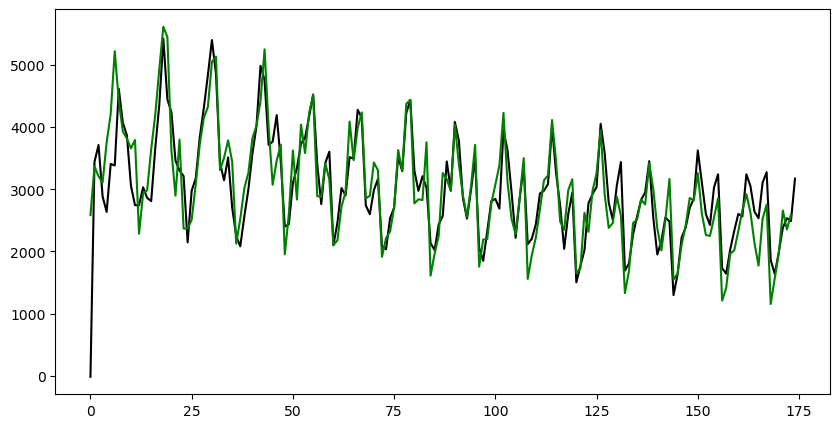

In [36]:
from statsmodels.tsa.api import SARIMAX
sarimax_mod = SARIMAX(F, order=(12, 1, 12), trend='ct')
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())
plt.figure(figsize = (10, 5))
plt.plot(sarimax_res.predict(0, len(Fort)), 'k')
plt.plot(Fort, 'g')
plt.show()


Выбрали ту же модель, что и в пункте 36

**44 задание**

E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


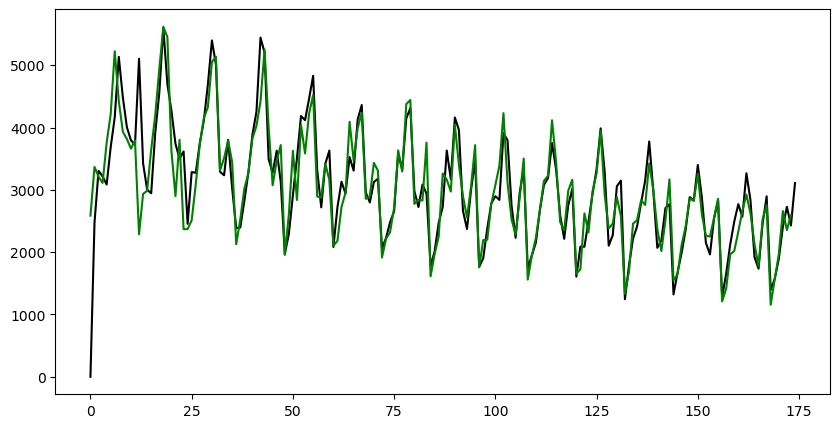

In [42]:
mod = SARIMAX(F, order=(12, 1, 12), seasonal_order=(0, 1, 0, 12), trend='ct')
mres = mod.fit()
mres.summary()
plt.figure(figsize = (10, 5))
plt.plot(mres.predict(0, len(Fort)), 'k')
plt.plot(Fort, 'g')
plt.show()


Параметры ARIMA были выбраны из пункта 36, параметры сезонности были выбраны следующие: (0, 1, 0, 12). Поскольку один и тот же ВР, то и параметр period снова остался равен 12.

In [43]:
mres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                     y   No. Observations:                  151
Model:             SARIMAX(12, 1, 12)x(0, 1, [], 12)   Log Likelihood                -994.932
Date:                               Sat, 06 Apr 2024   AIC                           2043.863
Time:                                       20:57:37   BIC                           2122.899
Sample:                                            0   HQIC                          2075.981
                                               - 151                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -24.8562     52.432     -0.474      0.635    -127.622      77.909
drift          0.2361      0.640      0.369      0.712      -1.018       1.490
ar.L1         -0.7693      0.167     -4.613      0.000      -1.096      -0.442
ar.L2         -0.9396      0.224     -4.197      0.000      -1.378      -0.501
ar.L3         -1.3085      0.252     -5.194      0.000      -1.802      -0.815
ar.L4         -1.5689      0.274     -5.733      0.000      -2.105      -1.033
ar.L5         -1.3076      0.299     -4.374      0.000      -1.893      -0.722
ar.L6         -1.3391      0.314     -4.266      0.000      -1.954      -0.724
ar.L7         -1.4562      0.289     -5.037      0.000      -2.023      -0.890
ar.L8         -1.1581      0.274     -4.221      0.000      -1.696      -0.620
ar.L9         -0.5378      0.247     -2.176      0.030      -1.022      -0.053
ar.L10        -0.4262      0.212     -2.012      0.044      -0.841      -0.011
ar.L11        -0.4004      0.158     -2.527      0.012      -0.711      -0.090
ar.L12        -0.0706      0.129     -0.548      0.583      -0.323       0.182
ma.L1         -0.1026      6.196     -0.017      0.987     -12.246      12.041
ma.L2          0.2388      1.434      0.167      0.868      -2.572       3.049
ma.L3          0.5006      7.158      0.070      0.944     -13.529      14.530
ma.L4          0.2818      3.813      0.074      0.941      -7.192       7.756
ma.L5         -0.1892      9.439     -0.020      0.984     -18.689      18.311
ma.L6         -0.0178      1.969     -0.009      0.993      -3.877       3.841
ma.L7          0.2114      9.339      0.023      0.982     -18.092      18.515
ma.L8         -0.2979      3.927     -0.076      0.940      -7.995       7.399
ma.L9         -0.5862      6.939     -0.084      0.933     -14.186      13.014
ma.L10        -0.3112      1.343     -0.232      0.817      -2.944       2.322
ma.L11         0.1648      5.507      0.030      0.976     -10.629      10.958
ma.L12        -0.8919      0.137     -6.513      0.000      -1.160      -0.623
sigma2      7.313e+04      0.001   6.02e+07      0.000    7.31e+04    7.31e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 7.19
Prob(Q):                              0.86   Prob(JB):                         0.03
Heteroskedasticity (H):               0.32   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.32e+24. Standard errors may be unstable.
"""